In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='serif', size=8)
plt.rc('text', usetex=True)

In [2]:
def update(x, gamma, m):
    return x + gamma / (1 + np.exp(x) / m)

def multiple_update(gamma, m, n):
    x = 0
    for i in range(n):
        x = update(x, gamma, m)
    return x

In [65]:
m = 10

Q = 100
gammas = [1e-3, 1e-1, 1e0]

f = np.zeros((Q, len(gammas)))
x = 0
for j in range(len(gammas)):
    for i in range(Q):
        f[i, j] = x
        x = update(x, gammas[j], m)

f /= np.sqrt(np.sum(f**2, axis=0))

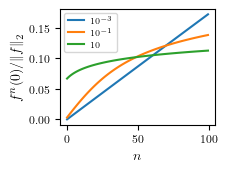

In [66]:
fig, ax = plt.subplots(figsize=(2, 1.5))
leg = []
for j in range(len(gammas)):
    a, = ax.plot(f[:, j])
    leg.append(a)

ax.set_xlabel('$n$', fontsize=10)
ax.set_ylabel('$f^{n}(0) / \|f\|_2$', fontsize=10)
ax.legend(leg, [r'$10^{-3}$', r'$10^{-1}$', r'$10$'], loc="best", fontsize=6)
fig.savefig('f_n.pdf', bbox_inches='tight')

In [51]:
alpha = 2
n = 100
p = (3+np.arange(n, dtype=float)) ** (-alpha)
Ns = (p / np.min(p)).astype(int)
Ns = np.clip(Ns, 0, Q)

In [52]:
q = np.zeros((n, len(gammas)), dtype=float)
for i in range(n):
    if Ns[i] > 0:
        q[i] = f[Ns[i]-1]

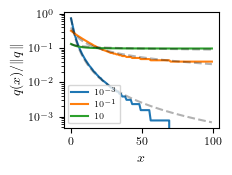

In [64]:
fig, ax = plt.subplots(figsize=(2, 1.5))
leg = []
for j in range(len(gammas)):
    a, = ax.plot(q[:, j] / np.sqrt(np.sum(q[:, j]**2)))
    leg.append(a)

ax.plot(p / np.sqrt(np.sum(p**2)), '--', color='black', alpha=0.3)
q2 = p**.35
ax.plot(q2 / np.sqrt(np.sum(q2**2)), '--', color='black', alpha=0.3)
q2 = p**.05
ax.plot(q2 / np.sqrt(np.sum(q2**2)), '--', color='black', alpha=0.3)

ax.set_xlabel('$x$', fontsize=10)
ax.set_yscale('log')
ax.set_ylabel('$q(x) / \|q\|$', fontsize=10)
ax.legend(leg, [r'$10^{-3}$', r'$10^{-1}$', r'$10$'], loc="best", fontsize=6)
fig.savefig('q_gamma.pdf', bbox_inches='tight')